# Stock Prediction
## STEP 1 : 시계열 데이터 준비
 - 칼럼 종류: Date, Open, High, Low, Close, Adj Close, Volume
 - Close를 선택하여 사용

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/005930.KS.csv' 
df = pd.read_csv(dataset_filepath) 
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4761.183105,74195000.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4348.184082,74680000.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4379.354004,54390000.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4317.015625,40305000.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4496.240723,46880000.0


In [2]:
# 이번에는 Date를 index_col로 지정해 주었습니다. 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4761.183105,74195000.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4348.184082,74680000.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,4379.354004,54390000.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4317.015625,40305000.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4496.240723,46880000.0


In [3]:
ts1 = df['Close']
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
2000-01-04    6110.0
2000-01-05    5580.0
2000-01-06    5620.0
2000-01-07    5540.0
2000-01-10    5770.0
Name: Close, dtype: float64

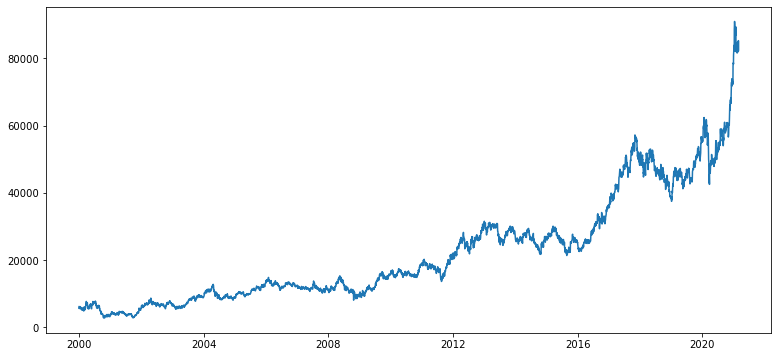

In [4]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

# STEP2 : 각종 전처리 수행
 - 결측치 처리
 - 로그 변환

In [5]:
# 결측치 여부 확인
# 1)결측치가 있는 데이터를 모두 삭제(drop)하거나, 2)결측치 양옆의 값들을 이용해서 적절히 보간(interpolate) 대입해 주는 방법이 있습니다. 2와 4 사이 데이터가 NaN이라면 이 값을 3으로 채우는 방식인 거죠. 이번 경우라면 시간을 index로 가지는 시계열 데이터이므로 삭제하는 것보다는 보간하는 방법
ts1[ts1.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

Date
2005-01-03   NaN
2017-11-16   NaN
2017-11-23   NaN
2018-01-02   NaN
2018-11-15   NaN
2019-11-14   NaN
Name: Close, dtype: float64

Series([], Name: Close, dtype: float64)


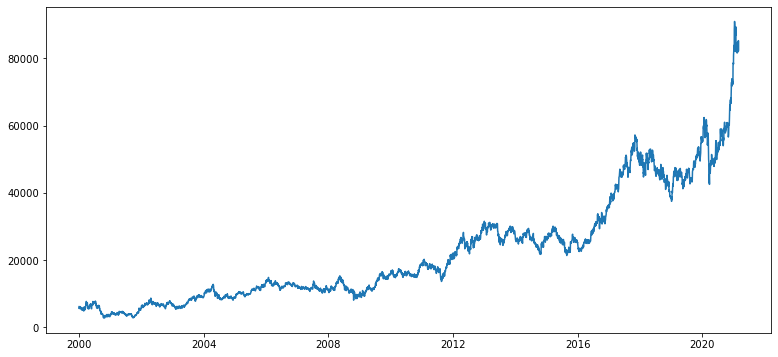

In [6]:
# 결측치가 있다면 이를 보간합니다. 보간 기준은 time을 선택합니다. 
ts1=ts1.interpolate(method='time')

# 보간 이후 결측치(NaN) 유무를 다시 확인합니다.
print(ts1[ts1.isna()])

# 다시 그래프를 확인해봅시다!
plt.plot(ts1)

# STEP3 : 시계열 안정성 분석
## 시계열 안정성의 정성적 분석
 - 시각화를 통해 안정성(Stationarity) 여부를 확인
 - 정성적 그래프 분석
 - 정량적 Augmented Dicky-Fuller Test
 - 시계열 분해(Time Series Decomposition)
 - Residual 안정성 확인

###  일정 시간 내 구간 통계치(Rolling Statistics)를 시각화
 - 일정 시간 내 구간 통계치(Rolling Statistics)를 시각화해 보는 함수입니다. 
 - 현재 타임스텝부터 window에 주어진 타임스텝 이전 사이 구간의 평균(rolling mean, 이동평균)과 표준편차(rolling std, 이동표준편차)를 
 - 원본 시계열과 함께 시각화해 보면 좀 더 뚜렷한 경향성을 확인할 수 있을 것

In [71]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)


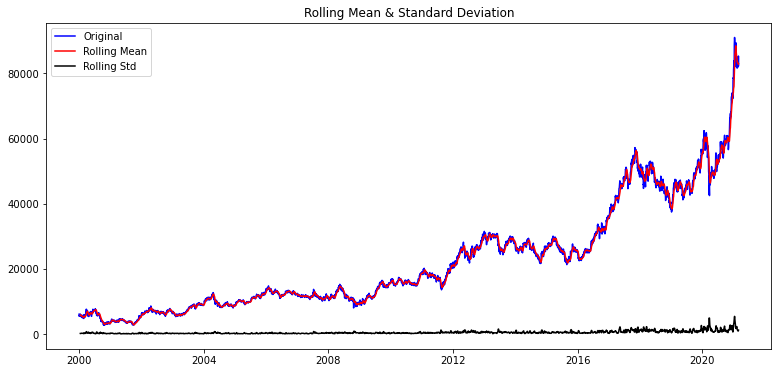

In [72]:
plot_rolling_statistics(ts1, window=12)

## 정성적 그래프 분석 결과
- 시간의 추이에 따라 평균과 분산이 증가하는 패턴을 보인다면 이 시계열 데이터는 적어도 안정적이진 않다고 정성적인 결론을 내려볼 수 있을 것 같습니다.

## 시계열 예측 Stationary 여부를 체크하는 통계적 방법
## Augmented Dickey-Fuller Test
 -  시계열 데이터의 안정성을 테스트하는 통계적 방법
 
## statsmodels 패키지와 adfuller 메소드

In [9]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메소드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메소드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)
    


In [10]:
augmented_dickey_fuller_test(ts1)

Results of Dickey-Fuller Test:
Test Statistic                    2.000055
p-value                           0.998673
#Lags Used                       28.000000
Number of Observations Used    5289.000000
Critical Value (1%)              -3.431587
Critical Value (5%)              -2.862087
Critical Value (10%)             -2.567061
dtype: float64


 - 시계열이 안정적이지 않다는 귀무가설은 P-value가 거의 1에 가깝게 나타났습니다. (0.998673)
 - 시계열이 안정적인 시계열이라고 말할 수 없습니다. 

# 시계열 예측의 기본 아이디어 : Stationary하게 만들 방법은 없을까?


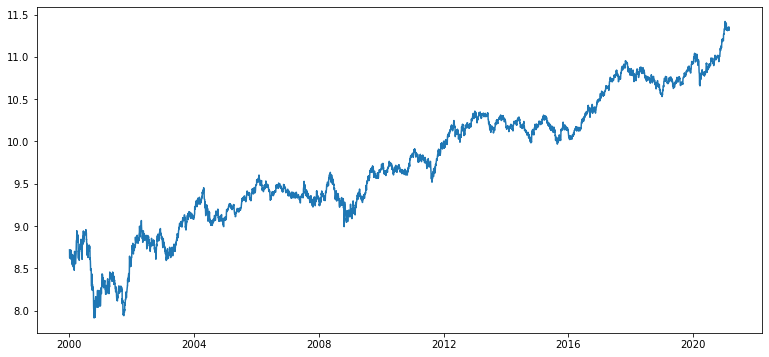

In [11]:
ts_log = np.log(ts1)
plt.plot(ts_log)

In [12]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                   -0.325391
p-value                           0.921830
#Lags Used                        4.000000
Number of Observations Used    5313.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567060
dtype: float64


###  Moving average 제거 - 추세(Trend) 상쇄하기

In [13]:
#moving_avg = ts_log.rolling(window=12).mean()  # moving average구하기 
#plt.plot(ts_log)
#plt.plot(moving_avg, color='red')

In [14]:
#ts_log_moving_avg = ts_log - moving_avg # 변화량 제거
#ts_log_moving_avg.head(15)

우리가 관심을 가진 ts_log_moving_avg에 거의 도달했습니다. 그런데 문제는 Moving Average 계산 시 (windows size=12인 경우) 앞의 11개의 데이터는 Moving Average가 계산되지 않으므로 ts_log_moving_avg에 결측치(NaN)가 발생한다는 점입니다.
이 결측치들은 향후 Dicky-Fuller Test 시에 에러를 발생시킬 것이므로 이를 데이터셋에서 제거해 줍니다.

In [15]:
#ts_log_moving_avg.dropna(inplace=True)
#ts_log_moving_avg.head(15)

In [16]:
#plot_rolling_statistics(ts_log_moving_avg)

In [17]:
#augmented_dickey_fuller_test(ts_log_moving_avg)

드디어 p-value가 0.02 수준이 되었습니다. 95% 이상의 confidence로 이 time series는 stationary하다고 할 수 있겠습니다.
하지만 Moving Average를 계산하는 window=12로 정확하게 지정해 주어야 한다는 점

In [18]:
#moving_avg_6 = ts_log.rolling(window=6).mean()
#ts_log_moving_avg_6 = ts_log - moving_avg_6
#ts_log_moving_avg_6.dropna(inplace=True)


In [19]:
#plot_rolling_statistics(ts_log_moving_avg_6)

In [20]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                   -0.325391
p-value                           0.921830
#Lags Used                        4.000000
Number of Observations Used    5313.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567060
dtype: float64


In [21]:
#ts_log_moving_avg_shift = ts_log_moving_avg.shift()

#plt.plot(ts_log_moving_avg, color='blue')
#plt.plot(ts_log_moving_avg_shift, color='green')

In [22]:
#ts_log_moving_avg_diff = ts_log_moving_avg - ts_log_moving_avg_shift
#ts_log_moving_avg_diff.dropna(inplace=True)
#plt.plot(ts_log_moving_avg_diff)

In [23]:
#plot_rolling_statistics(ts_log_moving_avg_diff)

In [24]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                   -0.325391
p-value                           0.921830
#Lags Used                        4.000000
Number of Observations Used    5313.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567060
dtype: float64


## 시계열 분해(Time series decomposition)
 - statsmodels 라이브러리 안에는 seasonal_decompose 메소드를 통해 시계열 안에 존재하는 trend, seasonality를 직접 분리해 낼 수 있는 기능이 있습니다. 이 기능을 활용하면 우리가 위에서 직접 수행했던 moving average 제거, differencing 등을 거치지 않고도 훨씬 안정적인 시계열을 분리해 낼 수 있게 됩니다. 이번에는 위에서 구했던 로그변환 단계(ts_log)에서부터 출발해 봅시다.

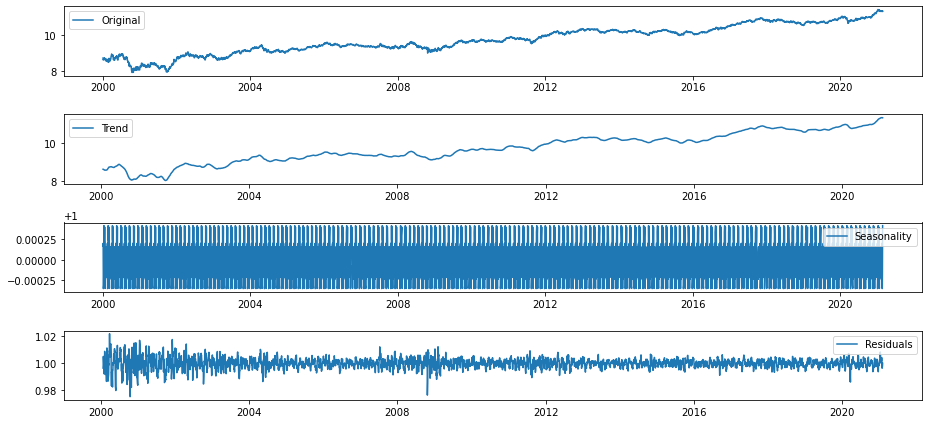

In [25]:

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, model='multiplicative', period = 30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

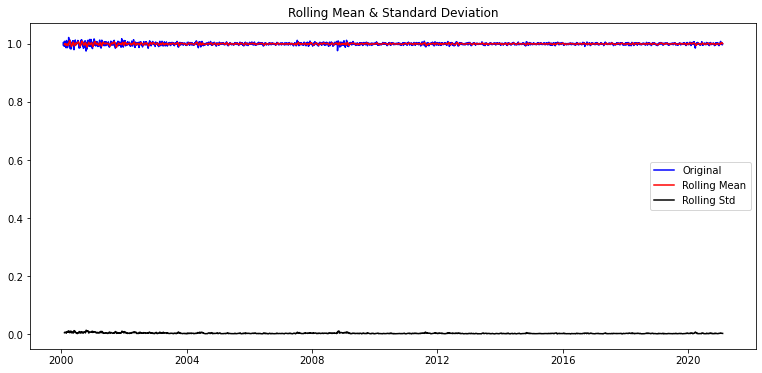

In [26]:
plt.rcParams["figure.figsize"] = (13,6)
plot_rolling_statistics(residual)

In [27]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -1.759298e+01
p-value                        3.955529e-30
#Lags Used                     3.300000e+01
Number of Observations Used    5.254000e+03
Critical Value (1%)           -3.431595e+00
Critical Value (5%)           -2.862090e+00
Critical Value (10%)          -2.567063e+00
dtype: float64


Decomposing을 통해 얻어진 Residual은 압도적으로 낮은 p-value를 보여 줍니다. 이 정도면 확실히 예측 가능한 수준의 안정적인 시계열이 얻어졌다고 볼 수 있겠습니다. 어쩌면 굳이 애써 직접 Trend, Seasonality를 제거하려고 애쓸 필요가 없이 바로 Time Series Decomposing을 시도하는 게 더 낫지 않았을까요? 물론 그렇긴 합니다만, 이렇게 Trend와 Seasonality를 제거해 주는 것이 어떤 효과를 발휘하게 되는지를 단계적으로 확인하는 과정이었다고 이해해 주시면 좋겠습니다.

# STEP4 : 학습, 테스트 데이터셋 생성

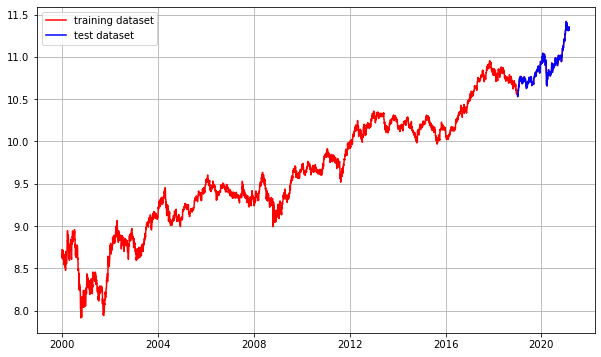

In [28]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [29]:
print(ts_log[:2])
print(train_data.shape)
print(test_data.shape)

Date
2000-01-04    8.717682
2000-01-05    8.626944
Name: Close, dtype: float64
(4786,)
(532,)


# STEP5 : 적정 ARIMA 모수 찾기

## ARIMA 모델의 개념

이전 스텝에서 우리는 시계열 데이터가 Trend와 Seasonality와 Residual로 Decompose되며, Trend와 Seasonality를 효과적으로 분리해 낸 경우 아주 예측력 있는 안정적인 시계열 데이터로 변환 가능하다는 것을 확인하였습니다.

바로 이런 원리를 활용하여 시계열 데이터 예측모델을 자동으로 만들어 주는 모델이 있습니다. 
ARIMA(Autoregressive Integrated Moving Average)입니다.

ARIMA는 AR(Autoregressive) + I(Integrated) + MA(Moving Average)가 합쳐진 모델입니다. 각각의 개념을 하나하나 살펴보면 바로 지금까지 우리가 다루어온 개념들과 닮아 있음을 알게 됩니다.

 - ACF, PACF 그려보기 -> p,q 구하기
 - 차분 안정성 확인 -> d 구하기

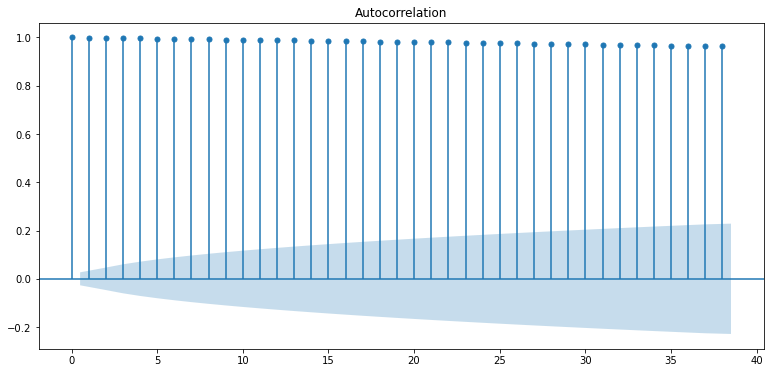

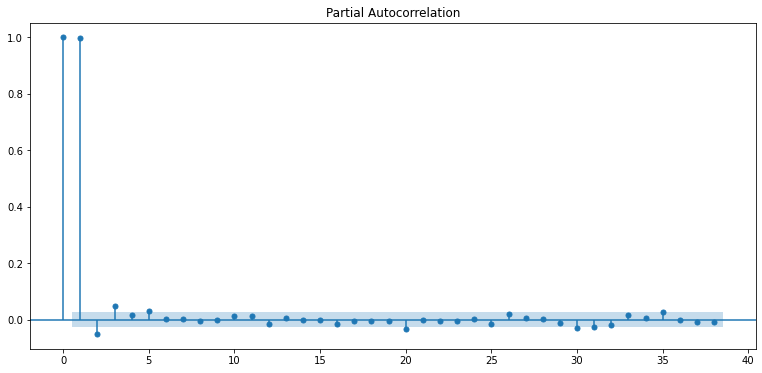

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -40.102097
p-value                           0.000000
#Lags Used                        3.000000
Number of Observations Used    5313.000000
Critical Value (1%)              -3.431581
Critical Value (5%)              -2.862084
Critical Value (10%)             -2.567060
dtype: float64


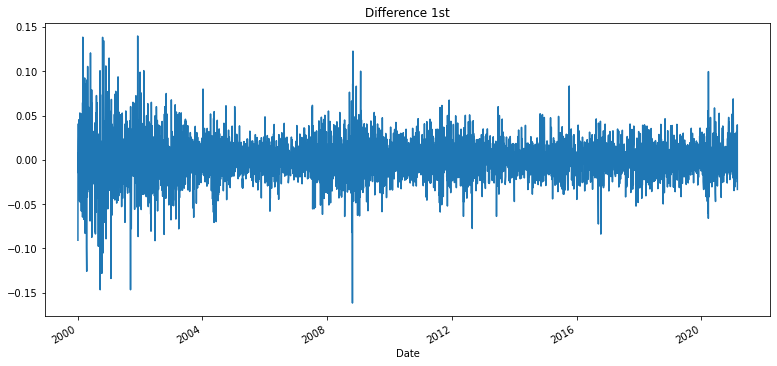

In [31]:
# 1차 차분 구하기
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

augmented_dickey_fuller_test(diff_1)

Results of Dickey-Fuller Test:
Test Statistic                  -21.827893
p-value                           0.000000
#Lags Used                       33.000000
Number of Observations Used    5282.000000
Critical Value (1%)              -3.431589
Critical Value (5%)              -2.862087
Critical Value (10%)             -2.567061
dtype: float64


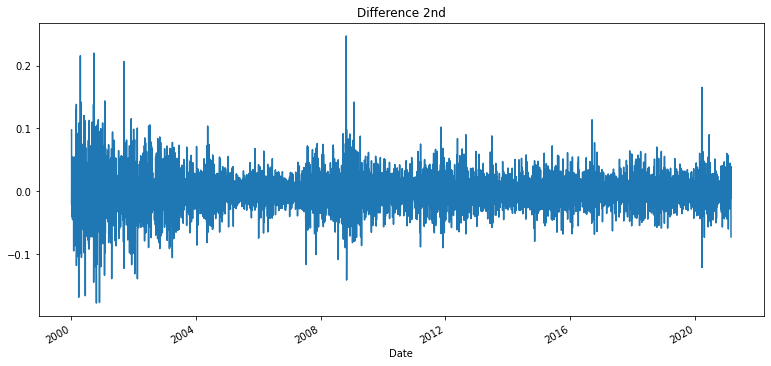

In [32]:
# 2차 차분 구하기
diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(title='Difference 2nd')

augmented_dickey_fuller_test(diff_2)

# STEP6 : ARIMA 모델 훈련과 테스트

## ARIMA 모델 훈련과 추론
- ARIMA 모델 빌드와 훈련
- 모델 테스트 및 플로팅
- 최종 예측 모델 정확도 측정(MAPE)

In [64]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 1))  # ARIMA(p,d,q)
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4785
Model:                 ARIMA(1, 1, 1)   Log Likelihood               11283.213
Method:                       css-mle   S.D. of innovations              0.023
Date:                Thu, 04 Mar 2021   AIC                         -22558.426
Time:                        00:05:44   BIC                         -22532.533
Sample:                             1   HQIC                        -22549.331
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004      0.000      1.121      0.262      -0.000       0.001
ar.L1.D.Close    -0.5127      0.134     -3.825      0.000      -0.775      -0.250
ma.L1.D.Close     0.5694      0.128     

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


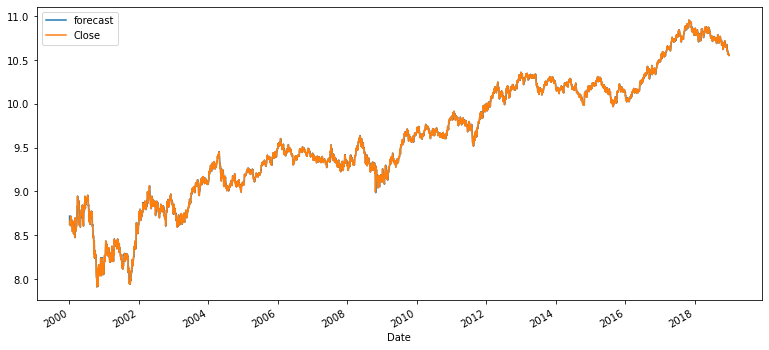

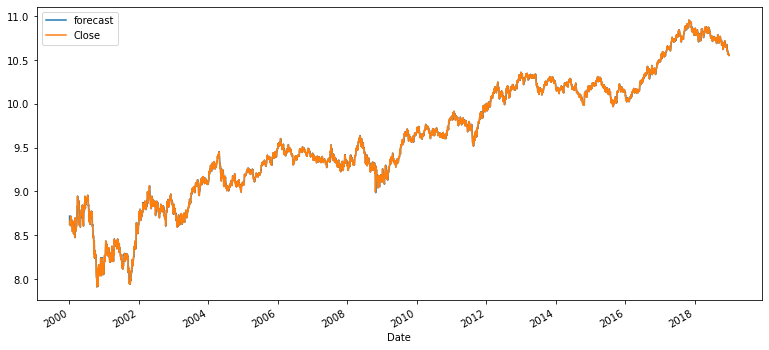

In [65]:
fitted_m.plot_predict()

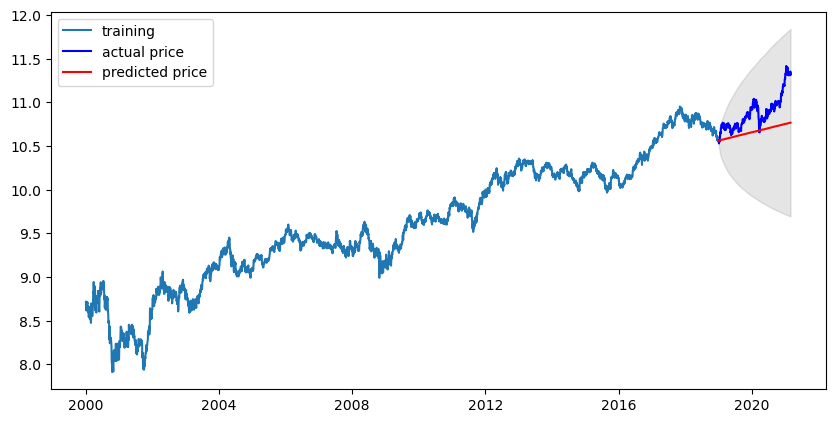

In [66]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()


In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  214902859.76692453
MAE:  11302.883616914552
RMSE:  14659.565469921832
MAPE: 18.69%


# STEP7 : 다른주식해보기

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath = os.getenv('HOME')+'/aiffel/stock_prediction/data/GOOG.csv' 
df = pd.read_csv(dataset_filepath, index_col='Date', parse_dates=True)



In [75]:
ts1 = df['Close']
print(type(ts1))
ts1.head()

<class 'pandas.core.series.Series'>


Date
2020-03-03    1341.390015
2020-03-04    1386.520020
2020-03-05    1319.040039
2020-03-06    1298.410034
2020-03-09    1215.560059
Name: Close, dtype: float64

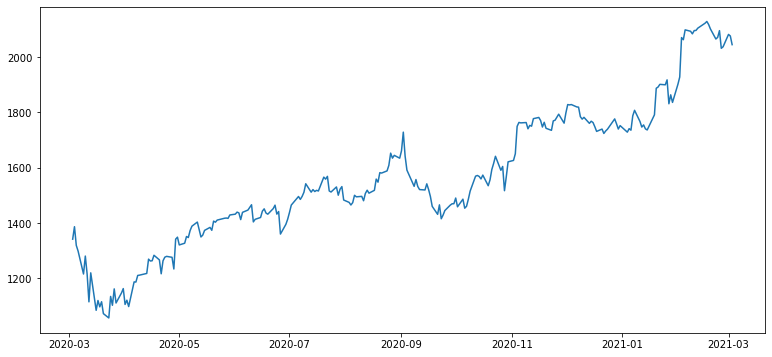

In [76]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6    # matlab 차트의 기본 크기를 13, 6으로 지정해 줍니다.

# 시계열(time series) 데이터를 차트로 그려 봅시다. 특별히 더 가공하지 않아도 잘 그려집니다.
plt.plot(ts1)

In [77]:
ts1[ts1.isna()]  # 시계열(Time Series)에서 결측치가 있는 부분만 Series로 출력합니다.

Series([], Name: Close, dtype: float64)

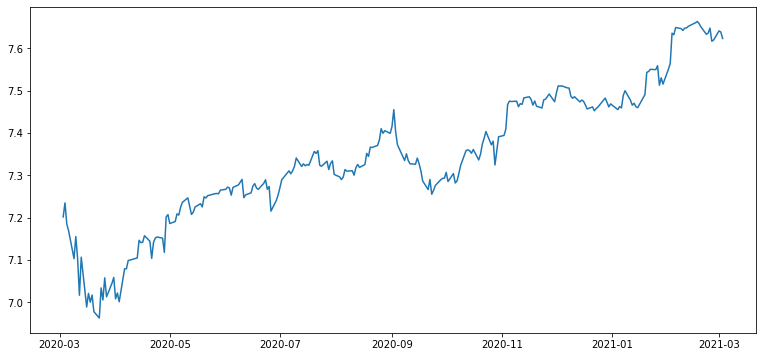

In [78]:
ts_log = np.log(ts1)
plt.plot(ts_log)

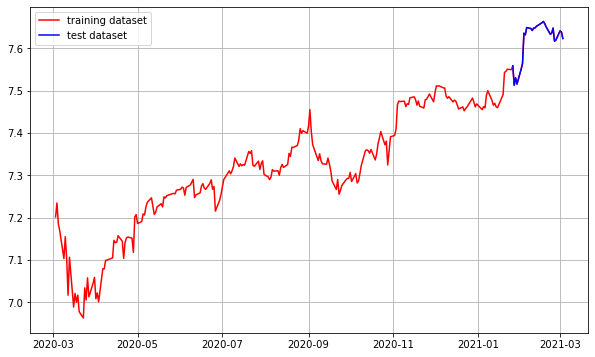

In [79]:
train_data, test_data = ts_log[:int(len(ts_log)*0.9)], ts_log[int(len(ts_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [80]:
from statsmodels.tsa.arima_model import ARIMA

# Build Model
model = ARIMA(train_data, order=(1, 1, 0))  # ARIMA(p,d,q)
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  226
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 525.949
Method:                       css-mle   S.D. of innovations              0.024
Date:                Thu, 04 Mar 2021   AIC                          -1045.898
Time:                        00:30:44   BIC                          -1035.636
Sample:                             1   HQIC                         -1041.757
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0015      0.001      1.249      0.211      -0.001       0.004
ar.L1.D.Close    -0.3013      0.063     -4.746      0.000      -0.426      -0.177
                                    Root

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been prov

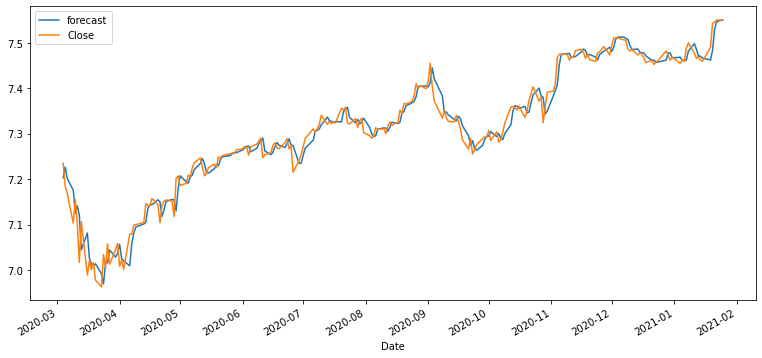

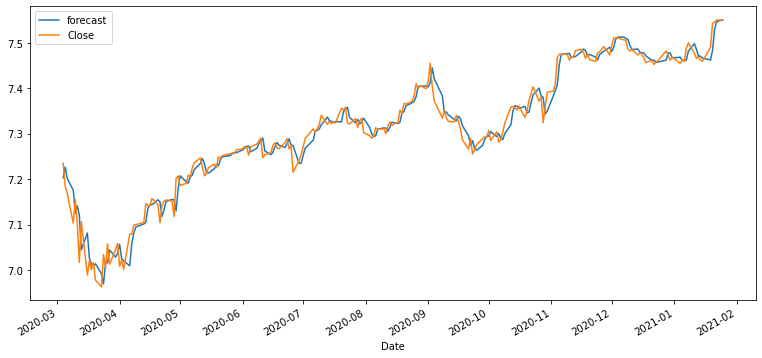

In [81]:
fitted_m.plot_predict()

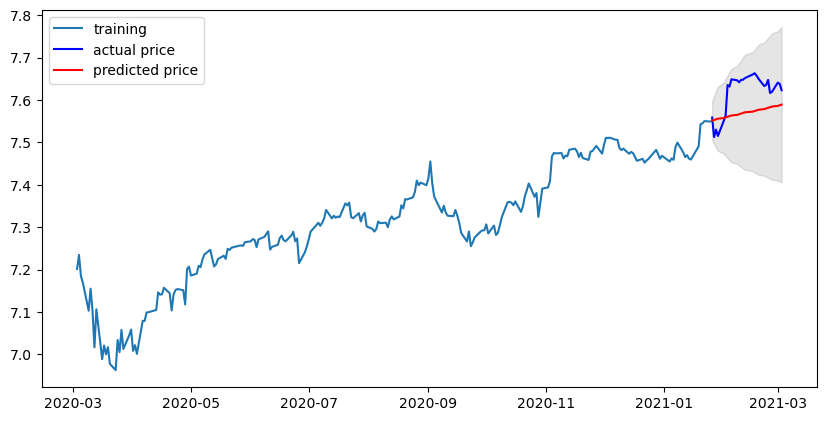

In [82]:
# Forecast : 결과가 fc에 담깁니다. 
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
lower_series = pd.Series(conf[:, 0], index=test_data.index)  # 예측결과의 하한 바운드
upper_series = pd.Series(conf[:, 1], index=test_data.index)  # 예측결과의 상한 바운드

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  15595.552503250497
MAE:  112.97770285151316
RMSE:  124.88215446271936
MAPE: 5.46%


# 루브릭
1. 시계열의 안정성이 충분히 확인되었는가?
 - 플로팅과 adfuller 메소드가 모두 적절히 사용되었음
2. ARIMA 모델 모수선택 근거를 체계적으로 제시하였는가?
 - p,q를 위한 ACF, PACF 사용과 d를 위한 차분 과정이 명확히 제시됨
3. 예측 모델의 오차율이 기준 이하로 정확하게 나왔는가?
 - 3개 이상 종목이 MAPE 10% 미만의 정확도로 예측됨

### 삼성 데이터 
 - 시계열이 안정적이지 않다는 귀무가설을 통해 P-value가 거의 1에 가깝게 나타남을 확인할 수 있었다. 값 : 0.998673
   따라서 시계열이 안정적인 시계열이라고 말할 수 없다.
 - 안정적인 시계열 데이터를 위해 Trend, Seasonality, Time Series를 통해 P-value가 낮춰지는것을 확인해보았다.
 - 위의 원리를 활용하여 자동으로 만들어주는 ARIMA 모델을 통해 적정 모수를 찾을 수 있었다. 
 - ARIMA 모델로 예측해본 결과 p, d, q 는 (1, 1, 0) 값이 최대 성능이 나오는것을 알 수 있었다. 
   
    * MSE:  214746746.26469508
    * MAE:  11296.362313772373
    * RMSE:  14654.239873316359
    * MAPE: 18.68%
 - PACF 그래프를 통해 p값은 1이 되는것을 확인할 수 있어서 P값을 고정을 하였고 q값을 3이상은 돌려볼수가 없었다.
 - 임의로 p, d, q의 값을 변경해보았지만 성능은 더 안좋아질뿐이었다...
 
### 구글 데이터
  - 삼성은 20년의 데이터로서 데이터 처리, 가공에 어려움이 있어 구글 주식 1년치 데이터를 통해 모델을 돌려보았다.
    
    * MSE:  15595.552503250497
    * MAE:  112.97770285151316
    * RMSE:  124.88215446271936
    * MAPE: 5.46%
